In [1]:
import glob
import cv2
import matplotlib.pyplot as plt

lps = [cv2.imread(a) for a in glob.glob("*.jpg")]

In [2]:
print(len(lps))

5


In [3]:
import cv2 as cv
import numpy as np

def denoise_sharp(image, kernel_size=(5, 5), sigma=5.0, amount=2.0, threshold=2):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    # denoise the sharpened image
    sharpened = cv.fastNlMeansDenoisingColored(sharpened,None,7,7,7,21)
    # contrast enhancement
    alpha = 1. # Contrast control (1.0-3.0)
    beta = 30 # Brightness control (0-100)
    
    sharpened = cv2.convertScaleAbs(sharpened, alpha=alpha, beta=beta)
    return sharpened

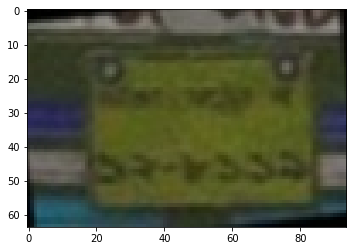

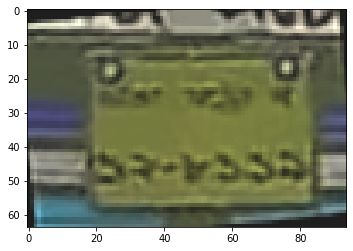

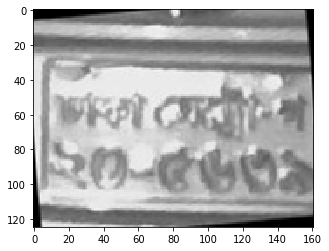

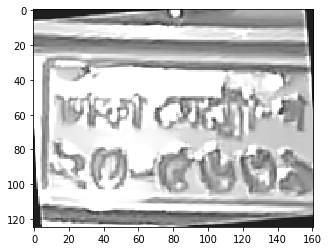

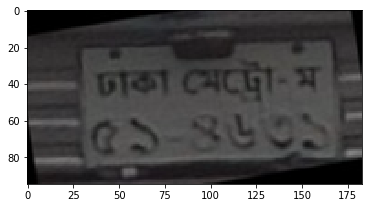

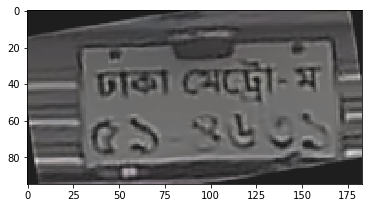

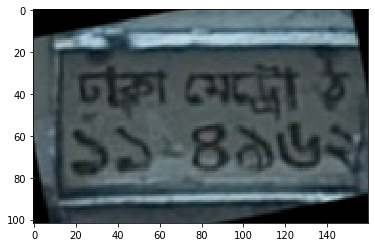

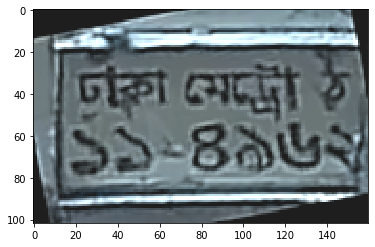

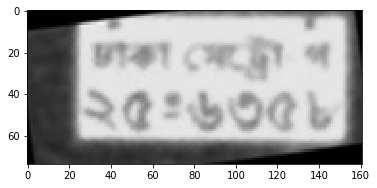

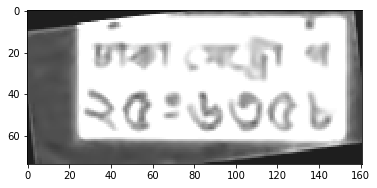

In [4]:
for i in range(len(lps)):
    plt.imshow(lps[i])
    plt.show()

    n_lp = denoise_sharp(lps[i])
    plt.imshow(n_lp)
    plt.show()

In [5]:
# read all images from trainA
# convert them to sharpened, denoised form

lps = sorted(glob.glob("../gan_denoising/trainA/*.jpg"))

In [6]:
print(len(lps))

2939


In [7]:
lps[543].split('\\')[-1]

'1487.jpg'

In [10]:
from tqdm import tqdm_notebook as tqdm

for lp in tqdm(lps):
    lp_name = lp.split('\\')[-1]
    img = cv2.imread(lp)
    
    img_conv = denoise_sharp(img)
    
    cv2.imwrite(f"../gan_denoising/trainA/{lp_name}", img_conv)
    